Problem posed by Alexander Bogomonly (https://twitter.com/CutTheKnotMath)

Problem: A tosses a fair coin 20 times. B does that 21 times. 

What's the probability B will have more heads than A ?

See:
1. [Problem](https://twitter.com/CutTheKnotMath/status/924701881292685312)
2. [Solutions](https://www.cut-the-knot.org/m/Probability/CoinTossingContest.shtml)

A combinatorial identity proposed by Taleb(https://twitter.com/nntaleb)

[Combinatorial Identity](https://twitter.com/nntaleb/status/924805829387309056)


Let 
m = number of cointosses by B

n = number of cointosses by A

Set p=q=1/2 (for a fair coin),

which vastly simplifies Taleb's original result.

For a fair coin, 
the probability P(B-A >=d), parametrized on the difference d between the number of heads, 
is then given by

---------------------------------------------------------------------------------

P(B-A >= d) = sum(w = d..max(m,n), (m choose w) x (1/2)^(m+n) x 2F1(-n,w-m,w+1,1))

---------------------------------------------------------------------------------

where 2F1(...) is the [generalized hypergeometric function](https://en.wikipedia.org/wiki/Generalized_hypergeometric_function#The_series_2F1)

This probability is computed below for various game configurations:

In [47]:
import scipy.special as ss
import fractions as ff

def talebcointoss(m,n,d):
    sum = 0
    for w in range(d,max(m,n)+1):
        s = ff.Fraction(1/2) ** (m+n)
        c = ss.comb(m,w)
        h = ss.hyp2f1(-n,w-m,w+1,1)
        sum += s*c*h
    return sum    

In [48]:
m=21
n=20
d=1
talebcointoss(m,n,d) #Result for the original problem posed by Alexander

0.5

Result obtained by Amit for m=22, n=20 coin tosses: https://twitter.com/gcfr20/status/924811626179629056

In [49]:
talebcointoss(22,20,1)

0.56119283562384226

Result obtained by Amit for m=3, n=1 coin tosses:https://twitter.com/gcfr20/status/924807489404710912

In [50]:
talebcointoss(3,1,1)

0.6875

Let's visualize this probability cadlag as the number of tosses for player B increase, holding A fixed at 20.

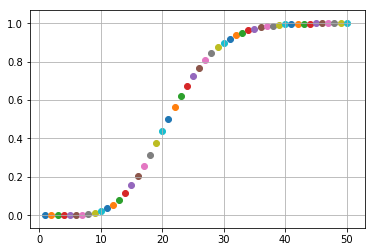

In [63]:
import matplotlib.pyplot as plt

plt.figure()
plt.grid(b=True, which='both', axis='both')
for m in range(1,51):
    plt.scatter(m, talebcointoss(m,20,d))
plt.show()

Some insights:

1. Even when both players toss a fair coin an equal number of times (m=n=20), there's a 40% chance that one of them ends up with more heads than the other. Equal distributions do not collapse to zero.

See: https://twitter.com/qwob/status/924796354135777282

2. When the other player is given twice as many turns (m=40,n=20),its almost certain he has more heads( ~100%)